# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.608868e+01     1.254215e+01
 * time: 0.0017430782318115234
     1     3.433440e+01     9.412716e+00
 * time: 0.0062580108642578125
     2     3.239947e+01     1.121772e+01
 * time: 0.011722087860107422
     3     2.623762e+01     7.238928e+00
 * time: 0.017479896545410156
     4     2.382277e+01     3.673374e+00
 * time: 0.02251291275024414
     5     2.345954e+01     4.983517e+00
 * time: 0.02686786651611328
     6     2.115072e+01     3.156401e+00
 * time: 0.031488895416259766
     7     1.977620e+01     1.765752e+00
 * time: 0.035997867584228516
     8     1.916613e+01     1.538943e+00
 * time: 0.040422916412353516
     9     1.877206e+01     9.785149e-01
 * time: 0.044816017150878906
    10     1.844900e+01     6.818210e-01
 * time: 0.049115896224975586
    11     1.841852e+01     1.701149e+00
 * time: 0.05243992805480957
    12     1.828854e+01     1.136034e+00
 * time: 0.05678105354309082
    13     1.813362e+01     1.227503e+

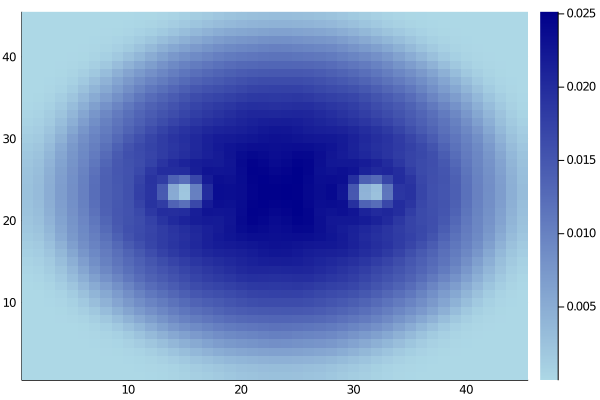

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)